In [1]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 1.7 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 30.6 MB 1.5 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [5]:
from google.colab import files
files.upload()
files.upload()


Saving ther_aff.png to ther_aff (1).png


Saving 000002.jpg to 000002 (1).jpg


{'000002.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x01\x00H\x00H\x00\x00\xff\xe1\x14\xf0Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x07\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00b\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00j\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x1b\x00\x00\x00r\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\x8d\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xa4\x00\x00\x00\xd0\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01Adobe Photoshop CS Windows\x002006:01:16 13:37:34\x00\x00\x00\x00\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x01@\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x00\xf0\x00\x00\x00\x00\x00\x00\x00\x06\x01\x03\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x01\x1e\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x01&\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x01\x00\x04\x00\x00\x00\x01\x00\x00\

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage import img_as_float
import imutils
from google.colab.patches import cv2_imshow

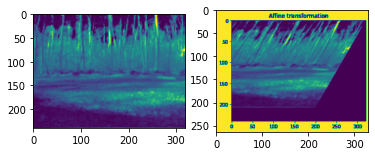

In [12]:
# Imports
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


# Open and convert the input and training-set image from BGR to GRAYSCALE
image1 = cv.imread(filename = '000002 (1).jpg',flags=cv.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(image1)
image2 = cv.imread(filename = 'ther_aff (1).png',
                   flags = cv.IMREAD_GRAYSCALE)
  


plt.subplot(1,2,2)
plt.imshow(image2)

In [13]:
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)

In [14]:
# Brute force matching.
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(des1,des2)

In [15]:
k1=len(kp1)
k2=len(kp2)
M=len(matches)
print('number of key points:',k1,'number of key points:',k2)
print('correct matches:',M)
print('%Match for i1:',M*100/k1)
print('%Match for i2:',M*100/k2)

number of key points: 614 number of key points: 526
correct matches: 313
%Match for i1: 50.9771986970684
%Match for i2: 59.50570342205323


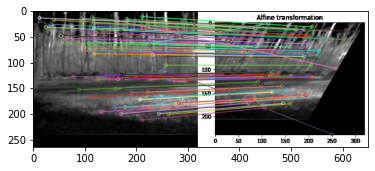

In [16]:

# Finding matches.
matches = sorted(matches, key = lambda x:x.distance)

# Drawing the matches between two images.
output = cv.drawMatches(img1 = image1,
                        keypoints1 = kp1,
                        img2 = image2,
                        keypoints2 = kp2,
                        matches1to2 = matches[:100],
                        outImg = None,
                        flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(output)
plt.show()